In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

We will generate fake data, that will simulate dataset of 100 outputs from 200 dimensional linear model along with appropriate predictors. Our goal will be estimation of the parameters of the model.

In [2]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

INFO:cmdstanpy:compiling stan file /Users/dominikwozniak/study/data_analytics/lab-4/generate_data.stan to exe file /Users/dominikwozniak/study/data_analytics/lab-4/generate_data
INFO:cmdstanpy:compiled model executable: /Users/dominikwozniak/study/data_analytics/lab-4/generate_data


In [14]:
I=7 #number of letters in name
N=7 #number of letters in surname
DoB=1810 #date of birth
seed=int(DoB*1e4+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

INFO:cmdstanpy:CmdStan start procesing


18100707


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### Coefficients of linear model
Only few of beta coefficients are significantly greater than 0.

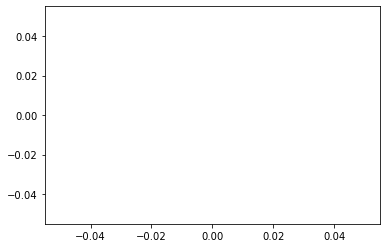

In [15]:
beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

This is an issue called sparsity. We will try to exploit that when infering the results via changing the prior structure. 

### Model 1 - uniform prior for beta

In [16]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')

INFO:cmdstanpy:compiling stan file /Users/dominikwozniak/study/data_analytics/lab-4/model1.stan to exe file /Users/dominikwozniak/study/data_analytics/lab-4/model1
INFO:cmdstanpy:compiled model executable: /Users/dominikwozniak/study/data_analytics/lab-4/model1


In [17]:
data_for_inference = {'N':100,
                      'M':200,
                      'X':generated_data.stan_variable('X')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [18]:
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

ERROR:cmdstanpy:Chain [1] error: error during processing Stale NFS file handle
ERROR:cmdstanpy:Chain [3] error: error during processing Stale NFS file handle
ERROR:cmdstanpy:Chain [2] error: error during processing Stale NFS file handle
ERROR:cmdstanpy:Chain [4] error: error during processing Stale NFS file handle


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)
	Exception: normal_lpdf: Random variable[1] is nan, but must be not nan! (in '/Users/dominikwozniak/study/data_analytics/lab-4/model1.stan', line 18, column 4 to column 41)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/dominikwozniak/study/data_analytics/lab-4/model1', 'id=1', 'random', 'seed=18100707', 'data', 'file=/var/folders/fn/y98bp0qn4wggf910v31fp44c0000gp/T/tmprvmdvfm2/hbhpp72e.json', 'output', 'file=/var/folders/fn/y98bp0qn4wggf910v31fp44c0000gp/T/tmprvmdvfm2/model1-20220402154112_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[70, 70, 70, 70]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/fn/y98bp0qn4wggf910v31fp44c0000gp/T/tmprvmdvfm2/model1-20220402154112_1.csv
 console_msgs (if any):
	/var/folders/fn/y98bp0qn4wggf910v31fp44c0000gp/T/tmprvmdvfm2/model1-20220402154112_0-stdout.txt

In [ ]:
print(fit_unf.diagnose())

#### Task 1. Evaluating model

1. Analyse the diagnosis of model. What sampling issues occured?
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta. 
3. Substract true values from fitted betas and make the same plot (residues)

### Model 2 - Narrow weakly informative prior.
We try to improve sampling by regularizing the search space with normal priors. This is prior used in ridge regression (but here is the bayesian context)

In [ ]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

In [ ]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

In [ ]:
print(fit_reg.diagnose())

#### Task 2. Evaluating model

1. Analyse the diagnosis of model. Are the sampling problems solved
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta. 
3. Substract true values from fitted betas and make the same plot (residues)

### Model 3 -  Sparsity enforcing prior

We will now try to enforce shrinking of small parameters using a Laplace prior. This is a prior that is used in Lasso regression. (but here is the bayesian context)

In [ ]:
model_lap = CmdStanModel(stan_file = 'model3.stan')

In [ ]:
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12) #sampling problematic some parameters have to be adjusted

In [ ]:
print(fit_lap.diagnose())

#### Task 3. Evaluating model

1. Analyse the diagnosis of model. Are the sampling problems solved. Are there any new sampling issues?
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta. 
3. Substract true values from fitted betas and make the same plot (residues)